# UCL MACHINE LEARNING REPOSITORY
##Dataset: [AI4I2020-Predictive Maintenance](https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset)

**Criteria: -**
*   EDA & Feature Engineering
*   Relevance
*   Domain Research for Feature Selection
*   Metric - (Accuracy).

Submitted by [Harsh Rathod](https://www.linkedin.com/in/rathodharsh/)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [71]:
df = pd.read_csv('https://github.com/h-rathod/UCI-ML-Repo/raw/main/ai4i2020.csv')

In [72]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [74]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [75]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [76]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [77]:
df.corr()

<ipython-input-77-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009154,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.022215,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,-0.023557,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273


<ipython-input-78-7564ade61527>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

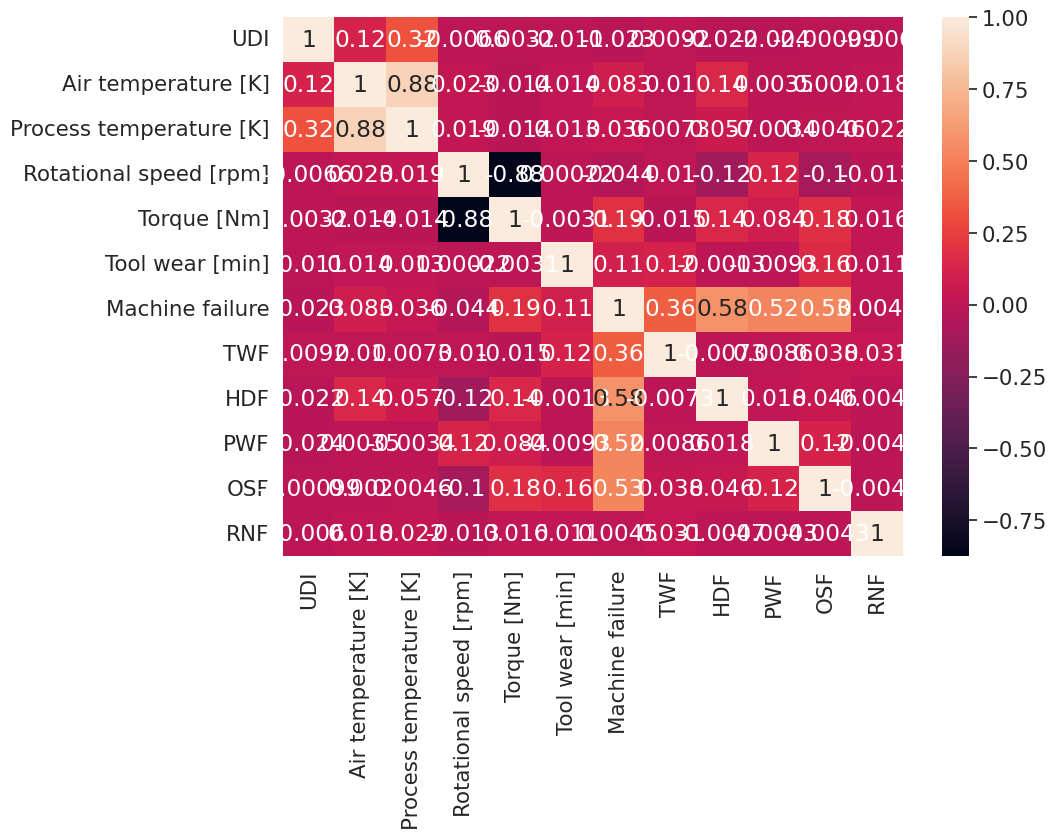

In [78]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [79]:
ndf = df.drop(['UDI','Product ID','TWF', 'HDF', 'PWF', 'OSF',
        'RNF'],axis=1)

In [80]:
dfn = pd.get_dummies(ndf, columns = ["Type"], prefix='Type', drop_first = False)

In [81]:
dfn['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [82]:
x = dfn.iloc[:,dfn.columns != 'Machine failure']
y = dfn['Machine failure']

In [83]:
x

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1
9996,298.9,308.4,1632,31.8,17,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1
9998,299.0,308.7,1408,48.5,25,1,0,0


In [84]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64

In [85]:
X = StandardScaler().fit_transform(x)
X

array([[-0.95238944, -0.94735989,  0.06818514, ..., -0.33388861,
        -1.22474487,  1.52861702],
       [-0.90239341, -0.879959  , -0.72947151, ..., -0.33388861,
         0.81649658, -0.65418609],
       [-0.95238944, -1.01476077, -0.22744984, ..., -0.33388861,
         0.81649658, -0.65418609],
       ...,
       [-0.50242514, -0.94735989,  0.59251888, ..., -0.33388861,
        -1.22474487,  1.52861702],
       [-0.50242514, -0.879959  , -0.72947151, ...,  2.99501081,
        -1.22474487, -0.65418609],
       [-0.50242514, -0.879959  , -0.2162938 , ..., -0.33388861,
        -1.22474487,  1.52861702]])

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=10)

In [87]:
#Logistic Regression
lg = LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [88]:
lg_pred = lg.predict(x_test)
lg_pred

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
lg_score = accuracy_score(lg_pred,y_test)
lg_score

0.9736

In [90]:
print(f"Train Score : {lg.score(x_train,y_train)}")
print(f"Test Score : {lg.score(x_test,y_test)}")

Train Score : 0.9685333333333334
Test Score : 0.9736


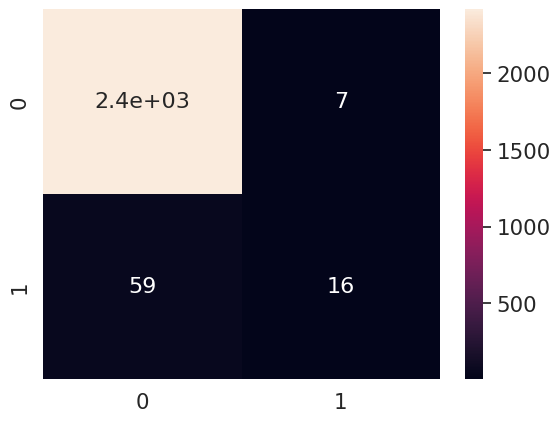

In [91]:
cm_lg = confusion_matrix(y_test,lg_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm_lg, annot=True, annot_kws={"size": 16})
plt.show()

In [92]:
print(classification_report(y_test,lg_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2425
           1       0.70      0.21      0.33        75

    accuracy                           0.97      2500
   macro avg       0.84      0.61      0.66      2500
weighted avg       0.97      0.97      0.97      2500



In [93]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [94]:
dtc_pred = dtc.predict(x_test)
dtc_pred

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
dtc_score = accuracy_score(dtc_pred,y_test)
dtc_score

0.9808

In [96]:
print(f"Train Score : { dtc.score(x_train,y_train)}")
print(f"Test Score : {dtc.score(x_test,y_test)}")

Train Score : 1.0
Test Score : 0.9808


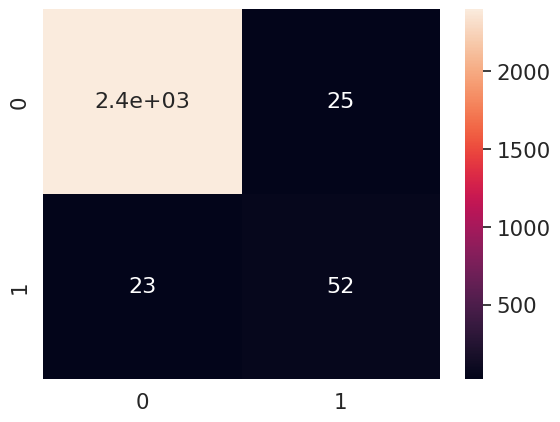

In [97]:
cm_dtc = confusion_matrix(y_test,dtc_pred)

sns.set(font_scale=1.4)
sns.heatmap(cm_dtc, annot=True, annot_kws={"size": 16})

plt.show()

In [98]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2425
           1       0.68      0.69      0.68        75

    accuracy                           0.98      2500
   macro avg       0.83      0.84      0.84      2500
weighted avg       0.98      0.98      0.98      2500



In [99]:
#K Neighbors Classifier
knc = KNeighborsClassifier(n_neighbors=5 , metric='minkowski',p=2  )
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [100]:
knc_pred = knc.predict(x_test)
knc_pred

array([0, 0, 0, ..., 0, 0, 0])

In [101]:
knc_score = accuracy_score(knc_pred,y_test)
knc_score

0.976

In [102]:
print(f"Train Score : {knc.score(x_train,y_train)}")
print(f"Test Score : {knc.score(x_test,y_test)}")

Train Score : 0.9794666666666667
Test Score : 0.976


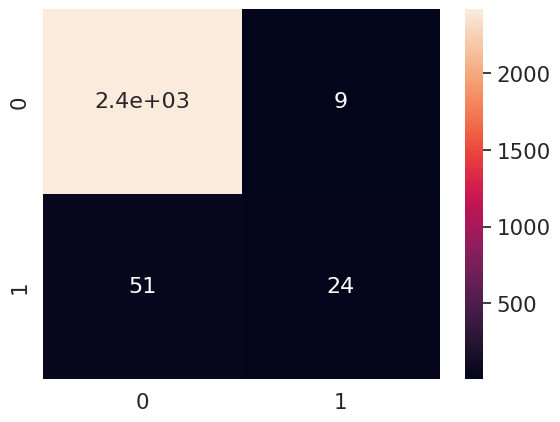

In [103]:
cm_knc = confusion_matrix(y_test,knc_pred)

sns.set(font_scale=1.4)
sns.heatmap(cm_knc, annot=True, annot_kws={"size": 16})

plt.show()

In [104]:
print(classification_report(y_test,knc_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2425
           1       0.73      0.32      0.44        75

    accuracy                           0.98      2500
   macro avg       0.85      0.66      0.72      2500
weighted avg       0.97      0.98      0.97      2500



In [105]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=10 , criterion='entropy')
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [106]:
rfc_pred = rfc.predict(x_test)
rfc_pred

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
rfc_score = accuracy_score(rfc_pred,y_test)
rfc_score

0.9796

In [108]:
print(f"Train Score : {rfc.score(x_train,y_train)}")
print(f"Test Score : {rfc.score(x_test,y_test)}")

Train Score : 0.9974666666666666
Test Score : 0.9796


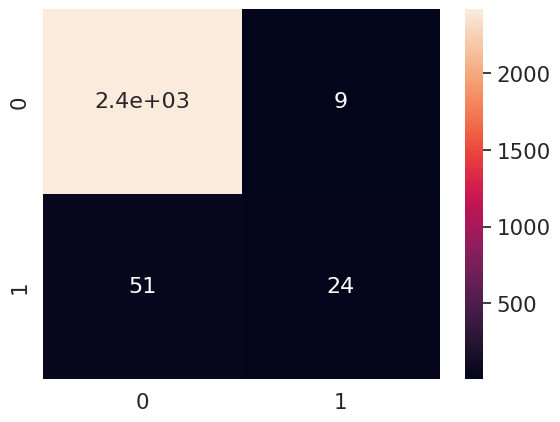

In [109]:
cm_knc = confusion_matrix(y_test,knc_pred)

sns.set(font_scale=1.4)
sns.heatmap(cm_knc, annot=True, annot_kws={"size": 16})

plt.show()

In [110]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2425
           1       0.88      0.37      0.52        75

    accuracy                           0.98      2500
   macro avg       0.93      0.69      0.76      2500
weighted avg       0.98      0.98      0.98      2500



# Accuracy

In [111]:
print(f"Logistic Regression: {lg_score}")
print(f"Decision Tree Classifier: {dtc_score}")
print(f"K Neighbors Classifier: {knc_score}")
print(f"Random Forest Classifier : {rfc_score}")

Logistic Regression: 0.9736
Decision Tree Classifier: 0.9808
K Neighbors Classifier: 0.976
Random Forest Classifier : 0.9796
